## Загрузка полученных данных

In [1]:
from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.model_selection import  learning_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

import torch
from torch_geometric.data import Data

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve

## Загрузка исходных данных

In [2]:
final_data = pd.read_csv('./Data/final_data.csv')

In [3]:
final_data.head(2)

,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,Клиент_НаличиеЗПпроекта_Н,Fraud_presence,Reject_presence
0,24630.0,1,119556.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1887000.0,1,1039411.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [4]:
final_data.shape

(7025564, 13)

In [5]:
final_data['client_inn'].unique().shape

(63864,)

In [6]:
final_data.shape

(7025564, 13)

In [7]:
data_X = final_data.drop(['Fraud_presence'], axis=1)

In [8]:
data_X.shape

(7025564, 12)

In [9]:
data_Y  = final_data['Fraud_presence']

In [11]:
# Load the file
pt_file_1 = torch.load("./graph_hope_1.pt")

pt_file_1 = pd.DataFrame(pt_file_1.numpy())

# Print the head of the file
print(pt_file_1.head(2))

           0            1             2         3         4          5  \
0    24630.0    44.000000   4886.000000  0.000000  0.000000   1.000000   
1  4972657.0  1210.608032  75453.414062  4.896894  5.418703  13.393207   

          6          7          8         9  
0  0.000000   0.000000   1.000000  0.000000  
1  2.351675  11.579055  14.481414  1.730347  


In [12]:
pt_file_2 = torch.load("./graph_hope_2.pt")

pt_file_2 = pd.DataFrame(pt_file_2.numpy())

# Print the head of the file
print(pt_file_2.head(2))

           0            1              2         3         4          5  \
0    24630.0    44.000000    4886.000000  0.000000  0.000000   1.000000   
1  9382997.0  1754.972046  108383.671875  7.124747  7.674322  19.626604   

          6          7          8         9  
0  0.000000   0.000000   1.000000  0.000000  
1  3.435207  16.834064  21.026817  2.664571  


In [13]:
pt_file_2.shape

(7025564, 10)

In [14]:
pt_file_3 = torch.load("./graph_hope_3.pt")

pt_file_3 = pd.DataFrame(pt_file_3.numpy())

# Print the head of the file
print(pt_file_3.head(2))

           0            1             2         3        4          5  \
0    24630.0    44.000000   4886.000000  0.000000  0.00000   1.000000   
1  6458278.5  1301.647827  80652.882812  5.310198  5.69885  14.519223   

          6          7          8        9  
0  0.000000   0.000000   1.000000  0.00000  
1  2.521633  12.525917  15.523928  1.94499  


In [17]:
all_feauters = pd.concat([data_X, pt_file_1, pt_file_2, pt_file_3], axis=1)
all_feauters.head(5)

,amount,client_inn,partner_inn,years,Длина_Отн_в_днях,Клиент_Сегмент_КБ,Клиент_Сегмент_МБ,Клиент_Сегмент_МКП,Клиент_Сегмент_СБ,Клиент_НаличиеЗПпроекта_Д,...,0,1,2,3,4,5,6,7,8,9
0,24630.0,1,119556.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,...,2.463000e+04,44.000000,4886.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
1,1887000.0,1,1039411.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,...,6.458278e+06,1301.647827,80652.882812,5.310198,5.698850,14.519223,2.521633,12.525917,15.523928,1.944990
2,983723.6,1,1.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,...,9.800780e+04,16.180094,1066.042358,0.055329,0.059258,0.212296,0.024398,0.135572,0.215708,0.023168
3,50737.0,1,1854478.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,...,1.009752e+05,21.040787,1283.950684,0.077280,0.088134,0.254482,0.033558,0.195867,0.257587,0.032577
4,292000.0,1,454803.0,44.0,4886.0,0.0,0.0,1.0,0.0,0.0,...,2.920000e+05,44.000000,4886.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [18]:
all_feauters.shape

(7025564, 42)

## Разделение данных на train и test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(all_feauters, data_Y, test_size=0.33, random_state=42)

## Random Forest Classifier

In [20]:
rf=RandomForestClassifier(random_state = 1, max_depth=10, n_estimators=60, n_jobs=-1)

In [21]:
rf.fit(X_train, y_train)

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(max_depth=10, n_estimators=60, n_jobs=-1, random_state=1)

In [22]:
predictions_rf = rf.predict(X_test)
predictions_rf

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
print("Precision:", precision_score(y_test, predictions_rf))
print("Recall: ", recall_score(y_test, predictions_rf))
print("Accuracy: ", accuracy_score(y_test, predictions_rf))
print("F1-score: ", f1_score(y_test, predictions_rf))
print("Log_loss: ", log_loss(y_test, predictions_rf))

Precision: 0.8200640686533827
Recall:  0.5374377642311655
Accuracy:  0.974001018789814
F1-score:  0.649330098725355
Log_loss:  0.8979772216482764


In [24]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.9622490763633756

In [25]:
predict = rf.predict_proba(X_test)
pos_param = predict[:, 1]

/data/home/krazheva/.conda/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, roc_auc_score, roc_curve

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

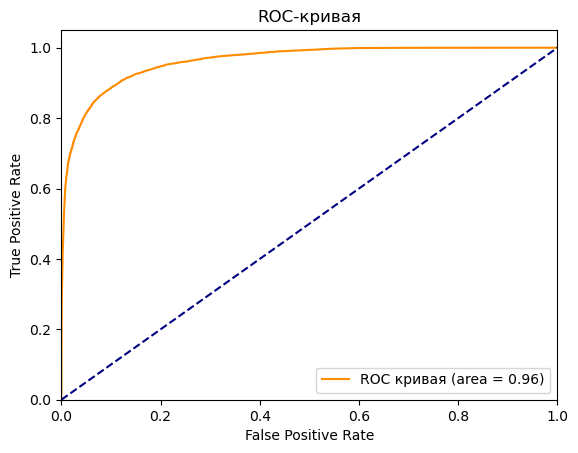

In [27]:
fpr, tpr, treshold = roc_curve(y_test, pos_param)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()